In [1]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

#pickle file 
import pickle

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [2]:
# Load dataset as dataframe
fetal_df = pd.read_csv('fetal_health.csv')
fetal_df.head()


# Dropping null values
fetal_df.dropna(inplace = True)
fetal_df.info()

#no categorical values for input columns
fetal_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
#convert from int to string classes

fetal_df['fetal_health'] = fetal_df['fetal_health'].replace([1.0,2.0,3.0],['Normal', 'Suspect','Pathological'])

fetal_df.head()

# Distribution of fetal health column
fetal_df['fetal_health'].value_counts(normalize = True)

# distribution is uneven 

fetal_health
Normal          0.778457
Suspect         0.138758
Pathological    0.082785
Name: proportion, dtype: float64

In [4]:
# Select input and output features
X = fetal_df.drop(columns = ['fetal_health'])
y = fetal_df['fetal_health']

# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()



,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [5]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

## Tuning model

In [6]:
# Start with an initial guess for parameters
hyper_params = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60], 
    'min_samples_leaf': [10, 20, 30, 40, 100]
}

In [7]:
# Creating folds; data imbalanced so must use stratafied k-folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [8]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = hyper_params, 
                        scoring = 'f1_weighted',
                        cv = folds, 
                        verbose = 1,
                        refit=False,
                        n_jobs = -1) # Will utilize all available CPUs 

In [9]:
# Fitting model on training data
model_cv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [10, 20, 30, 40, 100],
                         'min_samples_split': [20, 40, 60]},
             refit=False, scoring='f1_weighted', verbose=1)

In [10]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.9119036251715112
Initial parameters:  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [11]:
# Adapt grid based on result from initial grid search
hyper_params_new = {
    'max_depth': list(range(5, 15)), 
    'min_samples_split': list(range(5, 15)), 
    'min_samples_leaf': list(range(1, 10))
}

In [12]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = hyper_params_new, 
                        scoring = 'f1_weighted', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [13]:
# Fitting model on training data
model_cv.fit(train_X, train_y)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14]},
             scoring='f1_weighted', verbose=1)

In [14]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.9322392834215414
Improved parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [15]:
# Storing best model
bestClassTree = model_cv.best_estimator_

In [16]:
# Predictions on test set
y_pred = bestClassTree.predict(test_X)

## Visuals Analyzing Model

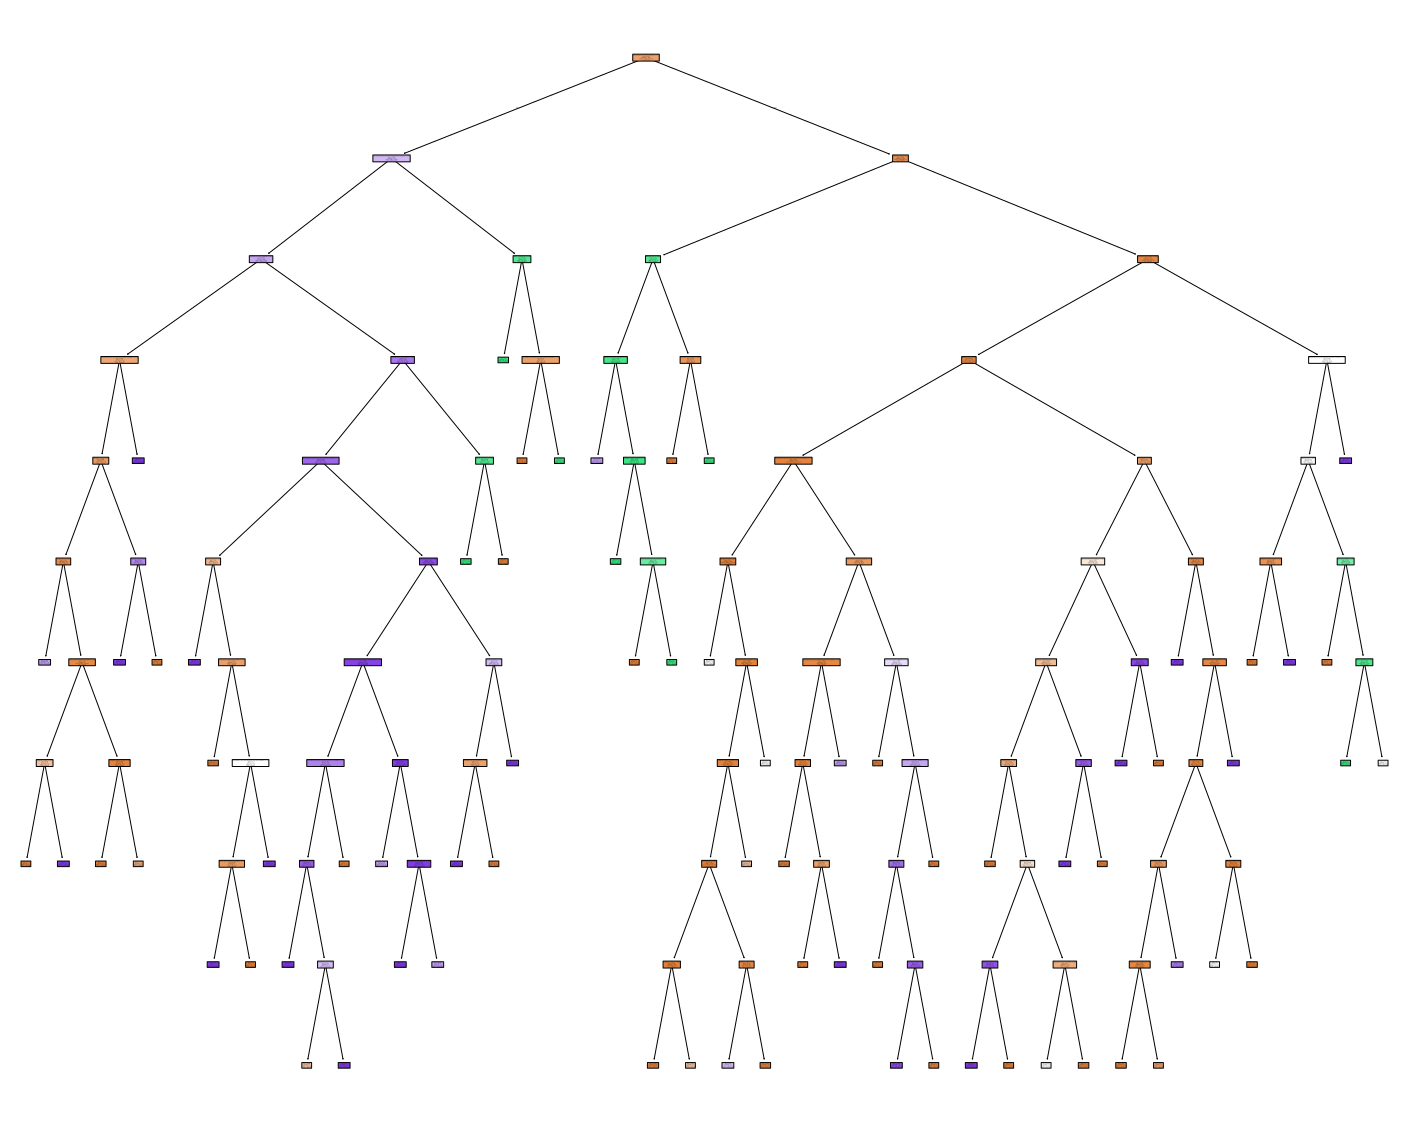

In [17]:
# Visualizing trained decision tree model
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = bestClassTree,
                   feature_names = train_X.columns,
                   class_names = ['Normal','Suspect','Pathological'],
                   filled = True)

# Saving Decision Tree
fig.savefig("fetal_dt.svg", bbox_inches = 'tight')

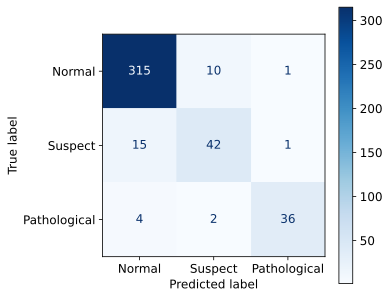

In [26]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = ['Normal','Suspect','Pathological'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal','Suspect','Pathological'])

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Blues', ax = ax); #check color

#Save confusion matrix
fig.savefig("confusion_mat_dt.svg", bbox_inches = 'tight')

In [30]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df = report_df.transpose()

report_df = report_df.reindex(['Normal','Suspect','Pathological','accuracy', 'macro avg','weighted avg'])

# Save the report as a CSV File
report_df.to_csv('class_report_dt.csv') 

report_df.head()

,precision,recall,f1-score,support
Normal,0.943114,0.966258,0.954545,326.000000
Suspect,0.777778,0.724138,0.750000,58.000000
Pathological,0.947368,0.857143,0.900000,42.000000
accuracy,0.922535,0.922535,0.922535,0.922535
macro avg,0.889420,0.849179,0.868182,426.000000


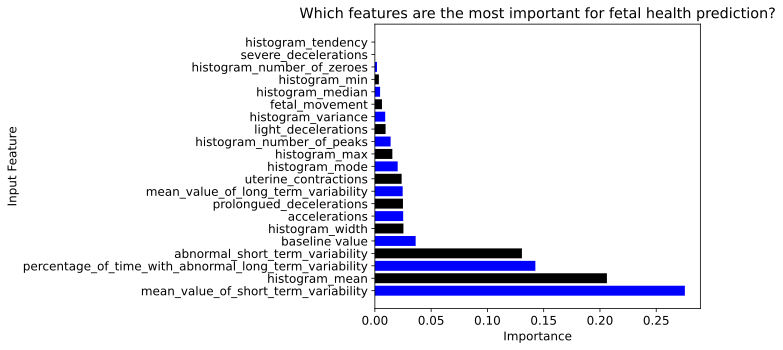

In [23]:
# Storing importance values from the trained model
importance = bestClassTree.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'black'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_dt.svg");

In [25]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
fetal_dt_pickle = open('fetal_dt.pickle', 'wb') 

# Write DT model to the file
pickle.dump(bestClassTree, fetal_dt_pickle) 

# Close the file
fetal_dt_pickle.close() 